In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read files

train_transaction = pd.read_csv('C:/Users/RW565TZ/Week7/train_transaction.csv')
train_identity = pd.read_csv('C:/Users/RW565TZ/Week7/train_identity.csv')
test_transaction = pd.read_csv('C:/Users/RW565TZ/Week7/test_transaction.csv')
test_identity = pd.read_csv('C:/Users/RW565TZ/Week7/test_identity.csv')

In [3]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
missing_values_count = train_transaction.isnull().sum()
print (missing_values_count[0:10])
total_cells = np.product(train_transaction.shape)
total_missing = missing_values_count.sum()
print ("% of missing data = ",(total_missing/total_cells) * 100)

TransactionID        0
isFraud              0
TransactionDT        0
TransactionAmt       0
ProductCD            0
card1                0
card2             8933
card3             1565
card4             1577
card5             4259
dtype: int64
% of missing data =  41.073431200111266


In [6]:
missing_values_count = train_identity.isnull().sum()
print (missing_values_count[0:10])
total_cells = np.product(train_identity.shape)
total_missing = missing_values_count.sum()
print ("% of missing data = ",(total_missing/total_cells) * 100)

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
dtype: int64
% of missing data =  35.58109650830896


In [7]:
missing_values_count = test_identity.isnull().sum()
print (missing_values_count[0:10])
total_cells = np.product(test_identity.shape)
total_missing = missing_values_count.sum()
print ("% of missing data = ",(total_missing/total_cells) * 100)

TransactionID         0
id-01                 0
id-02              4931
id-03             75426
id-04             75426
id-05              7157
id-06              7157
id-07            136848
id-08            136848
id-09             67569
dtype: int64
% of missing data =  36.18627245910109


In [8]:
# Merging data sets which were given separately

train_data = train_transaction.merge(train_identity, how="left", on="TransactionID")

test_data = test_transaction.merge(test_identity, how="left", on="TransactionID")

In [9]:
train_data.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64

In [10]:
train_data

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
test_data.isnull().sum()

TransactionID          0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
                   ...  
id-36             369714
id-37             369714
id-38             369714
DeviceType        369760
DeviceInfo        391634
Length: 433, dtype: int64

In [12]:
# The name mismatch between the Train and test datasets to be fixed

test_data= test_data.rename(columns=lambda x:"_".join(x.split("-")))

In [13]:
print(f'There are {train_data.isnull().any().sum()} columns in train dataset with missing values.')

There are 414 columns in train dataset with missing values.


In [14]:
# Identity information. 
# id_01 - id_11 are continuous variables
# id_12 - id_38 are categorical and the last two columns are obviously also categorical.

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64

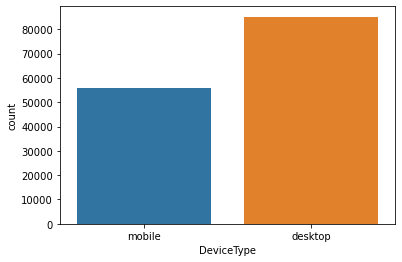

In [15]:
sns.countplot(train_data['DeviceType'])

train_data['DeviceType'].value_counts()

In [16]:
train_data['DeviceInfo'].value_counts()

Windows        47722
iOS Device     19782
MacOS          12573
Trident/7.0     7440
rv:11.0         1901
               ...  
LGMS345            1
verykool           1
XT1072             1
LG-H931            1
0PJA2              1
Name: DeviceInfo, Length: 1786, dtype: int64

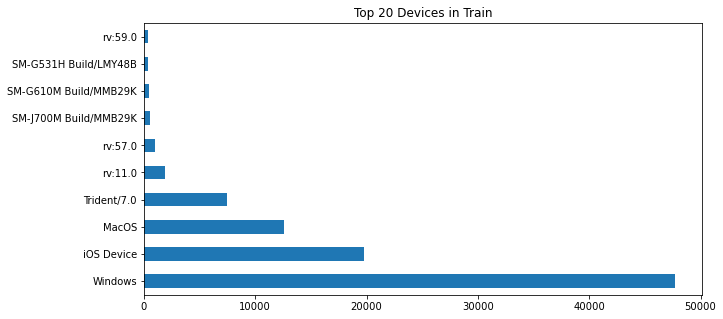

In [17]:
train_data['DeviceInfo'].value_counts().head(10).plot(kind='barh', figsize=(10, 5), title='Top 20 Devices in Train')
plt.show()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

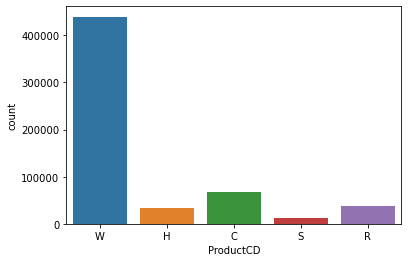

In [18]:
sns.countplot(train_data['ProductCD'])

train_data['ProductCD'].value_counts()

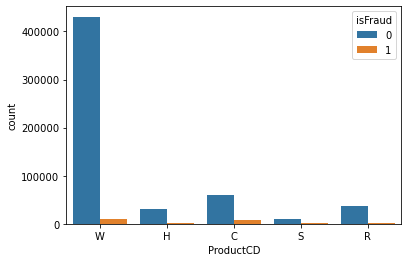

In [19]:
sns.countplot(data=train_data,x='ProductCD',hue='isFraud')
plt.show()

In [20]:
train_data['addr1'].value_counts().head(10)

299.0    46335
325.0    42751
204.0    42020
264.0    39870
330.0    26287
315.0    23078
441.0    20827
272.0    20141
123.0    16105
126.0    15243
Name: addr1, dtype: int64

In [21]:
train_data['addr2'].value_counts().head(10)

87.0    520481
60.0      3084
96.0       638
32.0        91
65.0        82
16.0        55
31.0        47
19.0        33
26.0        25
27.0        20
Name: addr2, dtype: int64

In [22]:
train_data['P_emaildomain'].value_counts()[:10]

gmail.com        228355
yahoo.com        100934
hotmail.com       45250
anonymous.com     36998
aol.com           28289
comcast.net        7888
icloud.com         6267
outlook.com        5096
msn.com            4092
att.net            4033
Name: P_emaildomain, dtype: int64

In [23]:
data = train_data.groupby('P_emaildomain')['isFraud'].sum()
data

P_emaildomain
aim.com               40
anonymous.com        859
aol.com              617
att.net               30
bellsouth.net         53
cableone.net           3
centurylink.net        0
cfl.rr.com             0
charter.net           25
comcast.net          246
cox.net               29
earthlink.net         11
embarqmail.com         9
frontier.com           8
frontiernet.net        5
gmail                 11
gmail.com           9943
gmx.de                 0
hotmail.co.uk          0
hotmail.com         2396
hotmail.de             0
hotmail.es            20
hotmail.fr             0
icloud.com           197
juno.com               6
live.com              84
live.com.mx           41
live.fr                0
mac.com               14
mail.com             106
me.com                27
msn.com               90
netzero.com            0
netzero.net            1
optonline.net         17
outlook.com          482
outlook.es            57
prodigy.net.mx         1
protonmail.com        31
ptd.net    

In [24]:
train_data['R_emaildomain'].value_counts()[:10]

gmail.com        57147
hotmail.com      27509
anonymous.com    20529
yahoo.com        11842
aol.com           3701
outlook.com       2507
comcast.net       1812
yahoo.com.mx      1508
icloud.com        1398
msn.com            852
Name: R_emaildomain, dtype: int64

In [25]:
data = train_data.groupby('R_emaildomain')['isFraud'].sum()
data

R_emaildomain
aim.com                1
anonymous.com        598
aol.com              129
att.net                0
bellsouth.net          2
cableone.net           0
centurylink.net        0
cfl.rr.com             0
charter.net            5
comcast.net           21
cox.net               11
earthlink.net          6
embarqmail.com         0
frontier.com           0
frontiernet.net        0
gmail                  0
gmail.com           6811
gmx.de                 0
hotmail.co.uk          0
hotmail.com         2140
hotmail.de             0
hotmail.es            20
hotmail.fr             0
icloud.com           180
juno.com               0
live.com              38
live.com.mx           44
live.fr                0
mac.com                2
mail.com              46
me.com                11
msn.com                1
netzero.com            0
netzero.net            2
optonline.net          2
outlook.com          414
outlook.es            57
prodigy.net.mx         1
protonmail.com        39
ptd.net    

In [26]:
card_cols = [c for c in train_data.columns if 'card' in c]
train_data[card_cols].head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


In [27]:
for col in card_cols:
    print(col+'  : ' + str(train_data[col].nunique()))

card1  : 13553
card2  : 500
card3  : 114
card4  : 4
card5  : 119
card6  : 4


visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

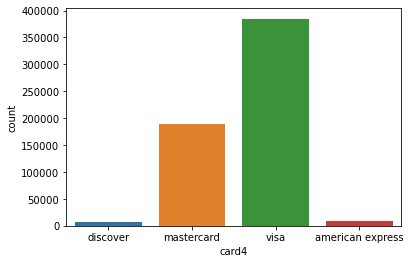

In [28]:
sns.countplot(train_data['card4'])

train_data['card4'].value_counts()

debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

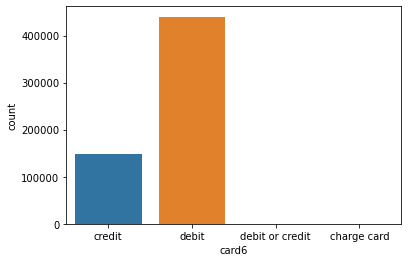

In [29]:
sns.countplot(train_data['card6'])

train_data['card6'].value_counts()

In [30]:
c_cols = [c for c in train_data if c[0] == 'C']
train_data[c_cols].head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [31]:
train_data[c_cols].describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215
std,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,2.000000
max,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,3331.000000,210.000000,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


In [32]:
d_cols = ['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14']
train_data[d_cols].head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14
0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN
1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN
3,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
train_data[d_cols].describe()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14
count,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000
mean,94.347568,169.563231,28.343348,140.002441,42.335965,69.805717,41.638950,146.058108,0.561057,123.982137,146.621465,54.037533,17.901295,57.724444
std,157.660387,177.315865,62.384721,191.096774,89.000144,143.669253,99.743264,231.663840,0.316880,182.615225,186.042622,124.274558,67.614425,136.312450
min,0.000000,0.000000,0.000000,-122.000000,0.000000,-83.000000,0.000000,0.000000,0.000000,0.000000,-53.000000,-83.000000,0.000000,-193.000000
25%,0.000000,26.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.958333,0.208333,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,97.000000,8.000000,26.000000,10.000000,0.000000,0.000000,37.875000,0.666666,15.000000,43.000000,0.000000,0.000000,0.000000
75%,122.000000,276.000000,27.000000,253.000000,32.000000,40.000000,17.000000,187.958328,0.833333,197.000000,274.000000,13.000000,0.000000,2.000000
max,640.000000,640.000000,819.000000,869.000000,819.000000,873.000000,843.000000,1707.791626,0.958333,876.000000,670.000000,648.000000,847.000000,878.000000


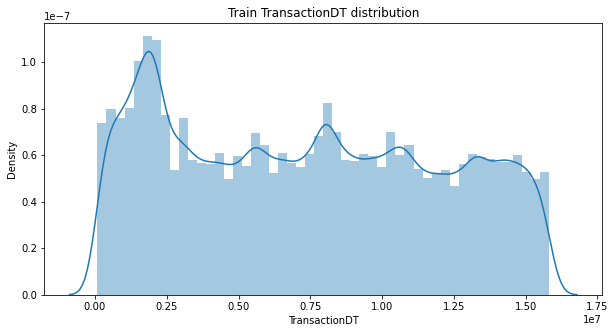

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(train_data["TransactionDT"])
plt.title('Train TransactionDT distribution')
plt.show()

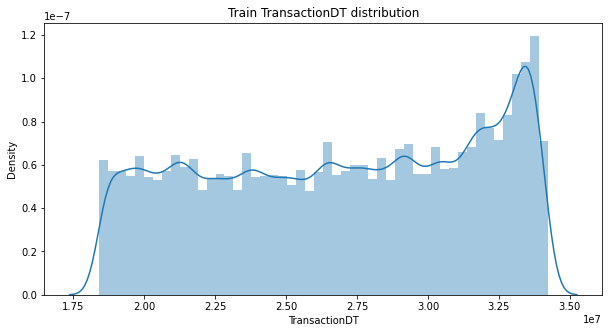

In [35]:
plt.figure(figsize=(10,5))
sns.distplot(test_data["TransactionDT"])
plt.title('Train TransactionDT distribution')
plt.show()

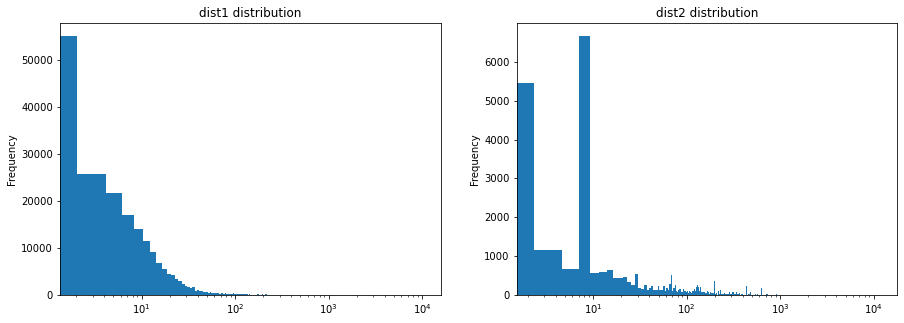

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
train_data['dist1'].plot(kind='hist',bins=5000,ax=ax1,title='dist1 distribution',logx=True)
train_data['dist2'].plot(kind='hist',bins=5000,ax=ax2,title='dist2 distribution',logx=True)
plt.show()

In [37]:
(np.sum(pd.isnull(train_data)).sort_values(ascending=False)/len(train_data))*100

id_24            99.196159
id_25            99.130965
id_07            99.127070
id_08            99.127070
id_21            99.126393
                   ...    
C3                0.000000
C2                0.000000
C1                0.000000
isFraud           0.000000
TransactionID     0.000000
Length: 434, dtype: float64

In [38]:
A = (np.sum(pd.isnull(train_data)).sort_values(ascending=False)/len(train_data))*100
Removed_col = A[A>0.4].index
train_data.drop(columns=Removed_col, inplace=True)

In [39]:
train_data.shape

(590540, 110)

In [40]:
A = (np.sum(pd.isnull(test_data)).sort_values(ascending=False)/len(test_data))*100
Removed_col = A[A>0.4].index
test_data.drop(columns=Removed_col, inplace=True)

In [41]:
test_data.shape

(506691, 93)

0    569877
1     20663
Name: isFraud, dtype: int64

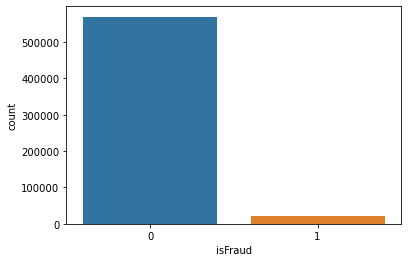

In [42]:
sns.countplot(train_data['isFraud'])

train_data['isFraud'].value_counts()

In [43]:
# Train data
#For numerical value imputation
for i in train_data.columns:
    if train_data[i].dtypes=='int64' or train_data[i].dtypes=='float64':
        train_data[i].fillna(train_data[i].mean(),inplace=True)
        
#For categorical value imputation
for i in train_data.columns:
    if train_data[i].dtypes=='object':
        train_data[i].fillna(train_data[i].mode()[0],inplace=True)
        
# Test data
#For numerical value imputation
for i in test_data.columns:
    if test_data[i].dtypes=='int64' or test_data[i].dtypes=='float64':
        test_data[i].fillna(test_data[i].mean(),inplace=True)
        
#For categorical value imputation
for i in test_data.columns:
    if test_data[i].dtypes=='object':
        test_data[i].fillna(test_data[i].mode()[0],inplace=True)

In [44]:
data = pd.concat([train_data, test_data])

In [45]:
df = pd.get_dummies(data,dummy_na=True,drop_first=True)

In [46]:
df.drop(columns = 'TransactionID', inplace = True)

In [47]:
df.shape

(1097231, 119)

In [48]:
df.dropna(inplace=True,axis=0)

In [49]:
X = df.drop('isFraud',axis=1).values.astype(np.float)
y = df['isFraud'].values.astype(np.float)

In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [52]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
from tensorflow.keras.models import Sequential

In [54]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [55]:
df.shape

(590540, 119)

In [56]:
dropout=0.5

model = Sequential()
model.add(Dense(250,activation='relu',kernel_regularizer=regularizers.l1(l1=0.00001)))
model.add(Dropout(dropout))
model.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l1(l1=0.00001)))
model.add(Dropout(dropout))
model.add(Dense(50,activation='relu',kernel_regularizer=regularizers.l2(l2=0.0001)))
model.add(Dropout(dropout))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
early_stop = EarlyStopping(monitor='val_loss',patience=4,verbose=2)

In [59]:
r = model.fit(X_train, y_train,epochs = 10,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/10
14764/14764 [==============================] - 79s 5ms/step - loss: 0.1498 - accuracy: 0.9649 - val_loss: 0.1352 - val_accuracy: 0.9649
Epoch 2/10
14764/14764 [==============================] - 76s 5ms/step - loss: 0.1399 - accuracy: 0.9650 - val_loss: 0.1341 - val_accuracy: 0.9649
Epoch 3/10
14764/14764 [==============================] - 74s 5ms/step - loss: 0.1392 - accuracy: 0.9650 - val_loss: 0.1339 - val_accuracy: 0.9649
Epoch 4/10
14764/14764 [==============================] - 78s 5ms/step - loss: 0.1389 - accuracy: 0.9650 - val_loss: 0.1340 - val_accuracy: 0.9649
Epoch 5/10
14764/14764 [==============================] - 77s 5ms/step - loss: 0.1386 - accuracy: 0.9650 - val_loss: 0.1333 - val_accuracy: 0.9649
Epoch 6/10
14764/14764 [==============================] - 78s 5ms/step - loss: 0.1386 - accuracy: 0.9650 - val_loss: 0.1351 - val_accuracy: 0.9649
Epoch 7/10
14764/14764 [==============================] - 82s 6ms/step - loss: 0.1385 - accuracy: 0.9650 - val_loss: 0

In [60]:
model_loss = pd.DataFrame(model.history.history)

In [61]:
model_loss

,loss,accuracy,val_loss,val_accuracy
0,0.149789,0.964911,0.135199,0.964854
1,0.139898,0.965049,0.134058,0.964854
2,0.139208,0.965049,0.133935,0.964854
3,0.138900,0.965049,0.134028,0.964854
4,0.138645,0.965049,0.133350,0.964854
5,0.138633,0.965049,0.135149,0.964854
6,0.138451,0.965049,0.132885,0.964854
7,0.138552,0.965049,0.132634,0.964854
8,0.138143,0.965049,0.132601,0.964854
9,0.138303,0.965049,0.132182,0.964854


In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               29750     
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               25100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5

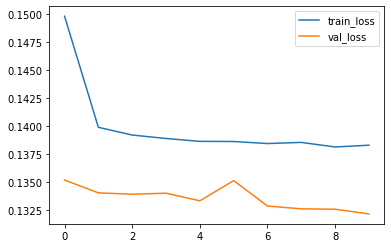

In [63]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(X_test)
predictions_classes = []
for i in predictions:
    prediction_class = np.argmax(i)
    predictions_classes.append(prediction_class)

cm = confusion_matrix(y_test, predictions_classes)
print(cm)

  62/3691 [..............................] - ETA: 9s

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test)
predictions_classes = []
for i in predictions:
    prediction_class = np.argmax(i)
    predictions_classes.append(prediction_class)

cm = classification_report(y_test, predictions_classes)
print(cm)

In [ ]:
!pip install imblearn --ignore-installed scikit-learn

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))